# **NASA Asteroid Classification**

## Classifying whether an asteroid is hazardous or not.

Being a data science enthusiast, I thought of using machine learning to predict whether an asteroid could be hazardous or not.
Searching on Kaggle, I found NASA’s dataset about some of the asteroids discovered so far. The dataset contains various information about the asteroids and labels each asteroid as hazardous or non-hazardous.

## **Importing Libraries and Dataset:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#For warnings-

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [4]:
#Importing Dataset-

df = pd.read_csv('C:/Users/cdac/Downloads/nasa.csv')

In [5]:
df

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False


## **EDA:**

In [6]:
#Checking Top 5 Reccords-

df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


**Some of the features’ description is given below-**

1. ‘Neo Reference ID’: This feature denotes the reference ID assigned to an asteroid.
2. ‘Name’: This feature denotes the name given to an asteroid.
3. ‘Absolute Magnitude’: This feature denotes the absolute magnitude of an asteroid. An asteroid’s absolute magnitude is the visual magnitude an observer would record if the asteroid were placed 1 Astronomical Unit (AU) away, and 1 AU from the Sun and at a zero phase angle.
4. ‘Est Dia in KM(min)’: This feature denotes the estimated diameter of the asteroid in kilometres (KM).
5. ‘Est Dia in M(min)’: This feature denotes the estimated diameter of the asteroid in meters(M).
6. ‘Relative Velocity km per sec’: This feature denotes the relative velocity of the asteroid in kilometre per second.
7. ‘Relative Velocity km per hr’: This feature denotes the relative velocity of the asteroid in kilometre per hour.
8. ‘Orbiting Body’: This feature denotes the planet around which the asteroid is revolving.
9. ‘Jupiter Tisserand Invariant’: This feature denotes the Tisserand’s parameter for the asteroid. Tisserand’s parameter (or Tisserand’s invariant) is a value calculated from several orbital elements(semi-major axis, orbital eccentricity, and inclination) of a relatively small object and a more substantial‘ perturbing body’. It is used to distinguish different kinds of orbits.
10. ‘Eccentricity’: This feature denotes the value of eccentricity of the asteroid’s orbit. Just like many other bodies in the solar system, the realms made by asteroids are not perfect circles, but ellipses. The axis marked eccentricity is a measure of how far from circular each orbit is: the smaller the eccentricity number, the more circular the realm.
11. ‘Semi Major Axis’: This feature denotes the value of the Semi Major Axis of the asteroid’s orbit. As discussed above, the realm of an asteroid is elliptical rather than circular. Hence, the Semi Major Axis exists.
12. ‘Orbital Period’: This feature denotes the value of the orbital period of the asteroid. Orbital period refers to the time taken by the asteroid to make one full revolution around its orbiting body.
13. ‘Perihelion Distance’: This feature denotes the value of the Perihelion distance of the asteroid. For a body orbiting the Sun, the point of least distance is the perihelion.
14. ‘Aphelion Dist’: This feature denotes the value of Aphelion distance of the asteroid. For a body orbiting the Sun, the point of greatest distance is the aphelion.
15. ‘Hazardous’: This feature denotes whether the asteroid is hazardous or not.

**To sum up, the features present in the dataset covers not only the information about the geometry of the asteroid but also its path and speed.**

In [7]:
df.tail()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False
4686,3772978,3772978,19.109,0.400641,0.895860,400.640618,895.859655,0.248946,0.556661,1314.437764,...,187.642183,653.679098,0.876110,222.436688,2.071980,2.458319e+06,184.820424,0.550729,J2000,False


In [8]:
df.shape

(4687, 40)

In [9]:
list[df.columns]

list[Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')]

In [10]:
#Getting familiar with the structure of the dataset-

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [11]:
df.dtypes

Neo Reference ID                  int64
Name                              int64
Absolute Magnitude              float64
Est Dia in KM(min)              float64
Est Dia in KM(max)              float64
Est Dia in M(min)               float64
Est Dia in M(max)               float64
Est Dia in Miles(min)           float64
Est Dia in Miles(max)           float64
Est Dia in Feet(min)            float64
Est Dia in Feet(max)            float64
Close Approach Date              object
Epoch Date Close Approach         int64
Relative Velocity km per sec    float64
Relative Velocity km per hr     float64
Miles per hour                  float64
Miss Dist.(Astronomical)        float64
Miss Dist.(lunar)               float64
Miss Dist.(kilometers)          float64
Miss Dist.(miles)               float64
Orbiting Body                    object
Orbit ID                          int64
Orbit Determination Date         object
Orbit Uncertainity                int64
Minimum Orbit Intersection      float64


In [12]:
#To know more about the dataset with transpose – here T is for the transpose

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Neo Reference ID,4687.0,3.272298e+06,5.486011e+05,2.000433e+06,3.097594e+06,3.514799e+06,3.690060e+06,3.781897e+06
Name,4687.0,3.272298e+06,5.486011e+05,2.000433e+06,3.097594e+06,3.514799e+06,3.690060e+06,3.781897e+06
Absolute Magnitude,4687.0,2.226786e+01,2.890972e+00,1.116000e+01,2.010000e+01,2.190000e+01,2.450000e+01,3.210000e+01
Est Dia in KM(min),4687.0,2.046042e-01,3.695734e-01,1.010543e-03,3.346224e-02,1.108039e-01,2.538370e-01,1.557955e+01
Est Dia in KM(max),4687.0,4.575089e-01,8.263912e-01,2.259644e-03,7.482384e-02,2.477650e-01,5.675969e-01,3.483694e+01
Est Dia in M(min),4687.0,2.046042e+02,3.695734e+02,1.010543e+00,3.346224e+01,1.108039e+02,2.538370e+02,1.557955e+04
Est Dia in M(max),4687.0,4.575089e+02,8.263912e+02,2.259644e+00,7.482384e+01,2.477650e+02,5.675969e+02,3.483694e+04
Est Dia in Miles(min),4687.0,1.271351e-01,2.296422e-01,6.279224e-04,2.079246e-02,6.885032e-02,1.577270e-01,9.680682e+00
Est Dia in Miles(max),4687.0,2.842828e-01,5.134956e-01,1.404077e-03,4.649336e-02,1.539540e-01,3.526882e-01,2.164666e+01
Est Dia in Feet(min),4687.0,6.712737e+02,1.212511e+03,3.315431e+00,1.097842e+02,3.635298e+02,8.327987e+02,5.111402e+04


In [13]:
df.Hazardous.describe()

count      4687
unique        2
top       False
freq       3932
Name: Hazardous, dtype: object

In [14]:
#Skewness-

df.skew()

Neo Reference ID                -1.102557
Name                            -1.102557
Absolute Magnitude               0.193925
Est Dia in KM(min)              17.670107
Est Dia in KM(max)              17.670107
Est Dia in M(min)               17.670107
Est Dia in M(max)               17.670107
Est Dia in Miles(min)           17.670107
Est Dia in Miles(max)           17.670107
Est Dia in Feet(min)            17.670107
Est Dia in Feet(max)            17.670107
Epoch Date Close Approach       -0.295022
Relative Velocity km per sec     0.887880
Relative Velocity km per hr      0.887880
Miles per hour                   0.887880
Miss Dist.(Astronomical)        -0.102394
Miss Dist.(lunar)               -0.102394
Miss Dist.(kilometers)          -0.102394
Miss Dist.(miles)               -0.102394
Orbit ID                         4.846333
Orbit Uncertainity               0.154761
Minimum Orbit Intersection       1.474985
Jupiter Tisserand Invariant      0.111239
Epoch Osculation                -4

In [15]:
#Kurtosis-

df.kurtosis()

Neo Reference ID                 -0.273642
Name                             -0.273642
Absolute Magnitude               -0.535836
Est Dia in KM(min)              652.591574
Est Dia in KM(max)              652.591574
Est Dia in M(min)               652.591574
Est Dia in M(max)               652.591574
Est Dia in Miles(min)           652.591574
Est Dia in Miles(max)           652.591574
Est Dia in Feet(min)            652.591574
Est Dia in Feet(max)            652.591574
Epoch Date Close Approach        -1.121068
Relative Velocity km per sec      0.810287
Relative Velocity km per hr       0.810287
Miles per hour                    0.810287
Miss Dist.(Astronomical)         -1.189604
Miss Dist.(lunar)                -1.189604
Miss Dist.(kilometers)           -1.189604
Miss Dist.(miles)                -1.189604
Orbit ID                         37.288559
Orbit Uncertainity               -1.565828
Minimum Orbit Intersection        1.757321
Jupiter Tisserand Invariant      -0.762700
Epoch Oscul

In [16]:
#let’s check that if our dataset have null values or not

df.isnull().head(10)

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
df.isnull().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

<Axes: >

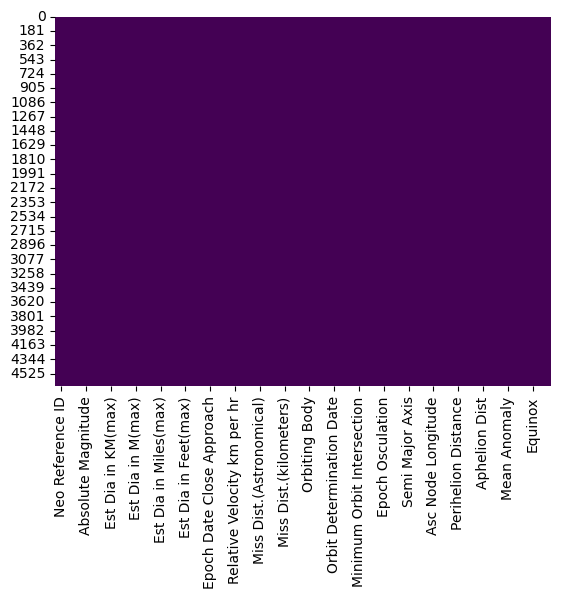

In [18]:
#Missing value heatmap-

sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

#### Luckily we don't have any missing values

In [19]:
df.Hazardous.value_counts()

False    3932
True      755
Name: Hazardous, dtype: int64

In [20]:
#Find the duplicates

df.duplicated().sum()

0

In [21]:
#Droping Columns which are not Required for Classification-

df = df.drop(['Neo Reference ID', 'Name', 'Orbit ID', 'Close Approach Date',
                            'Epoch Date Close Approach', 'Orbit Determination Date'], axis =1)

df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,6.115834,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173874,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,9.840831,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [22]:
#Correlation-

df.corr()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
Absolute Magnitude,1.000000,-0.613482,-0.613482,-0.613482,-0.613482,-0.613482,-0.613482,-0.613482,-0.613482,-0.376853,...,-0.459632,-0.011470,-0.206774,0.086966,0.031784,-0.256169,-0.115855,-0.049401,0.195652,-0.325522
Est Dia in KM(min),-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.242141,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in KM(max),-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.242141,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in M(min),-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.242141,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in M(max),-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.242141,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in Miles(min),-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.242141,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in Miles(max),-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.242141,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in Feet(min),-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.242141,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in Feet(max),-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.242141,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Relative Velocity km per sec,-0.376853,0.242141,0.242141,0.242141,0.242141,0.242141,0.242141,0.242141,0.242141,1.000000,...,0.514657,-0.021301,0.017961,-0.506978,-0.002913,0.144782,0.020006,0.017685,0.022452,0.191970


<Axes: >

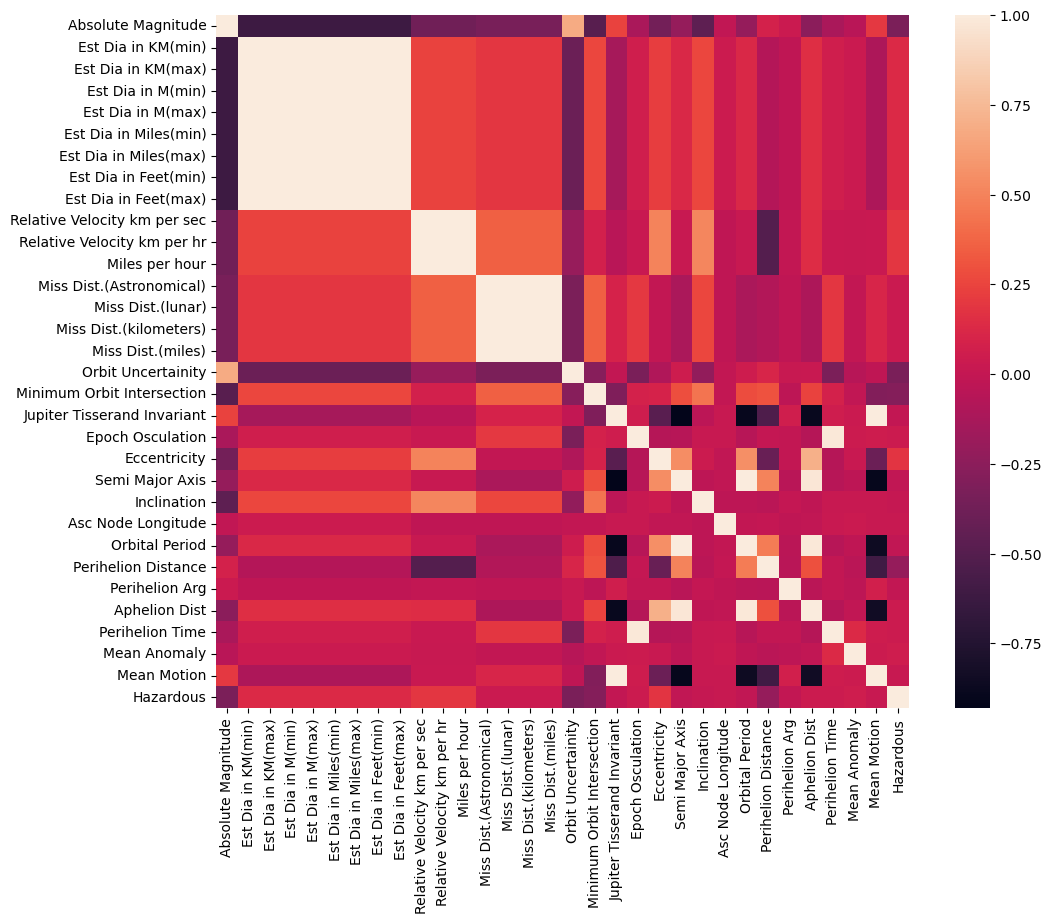

In [23]:
corrmat = df.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corrmat, vmax = 1, square = True)

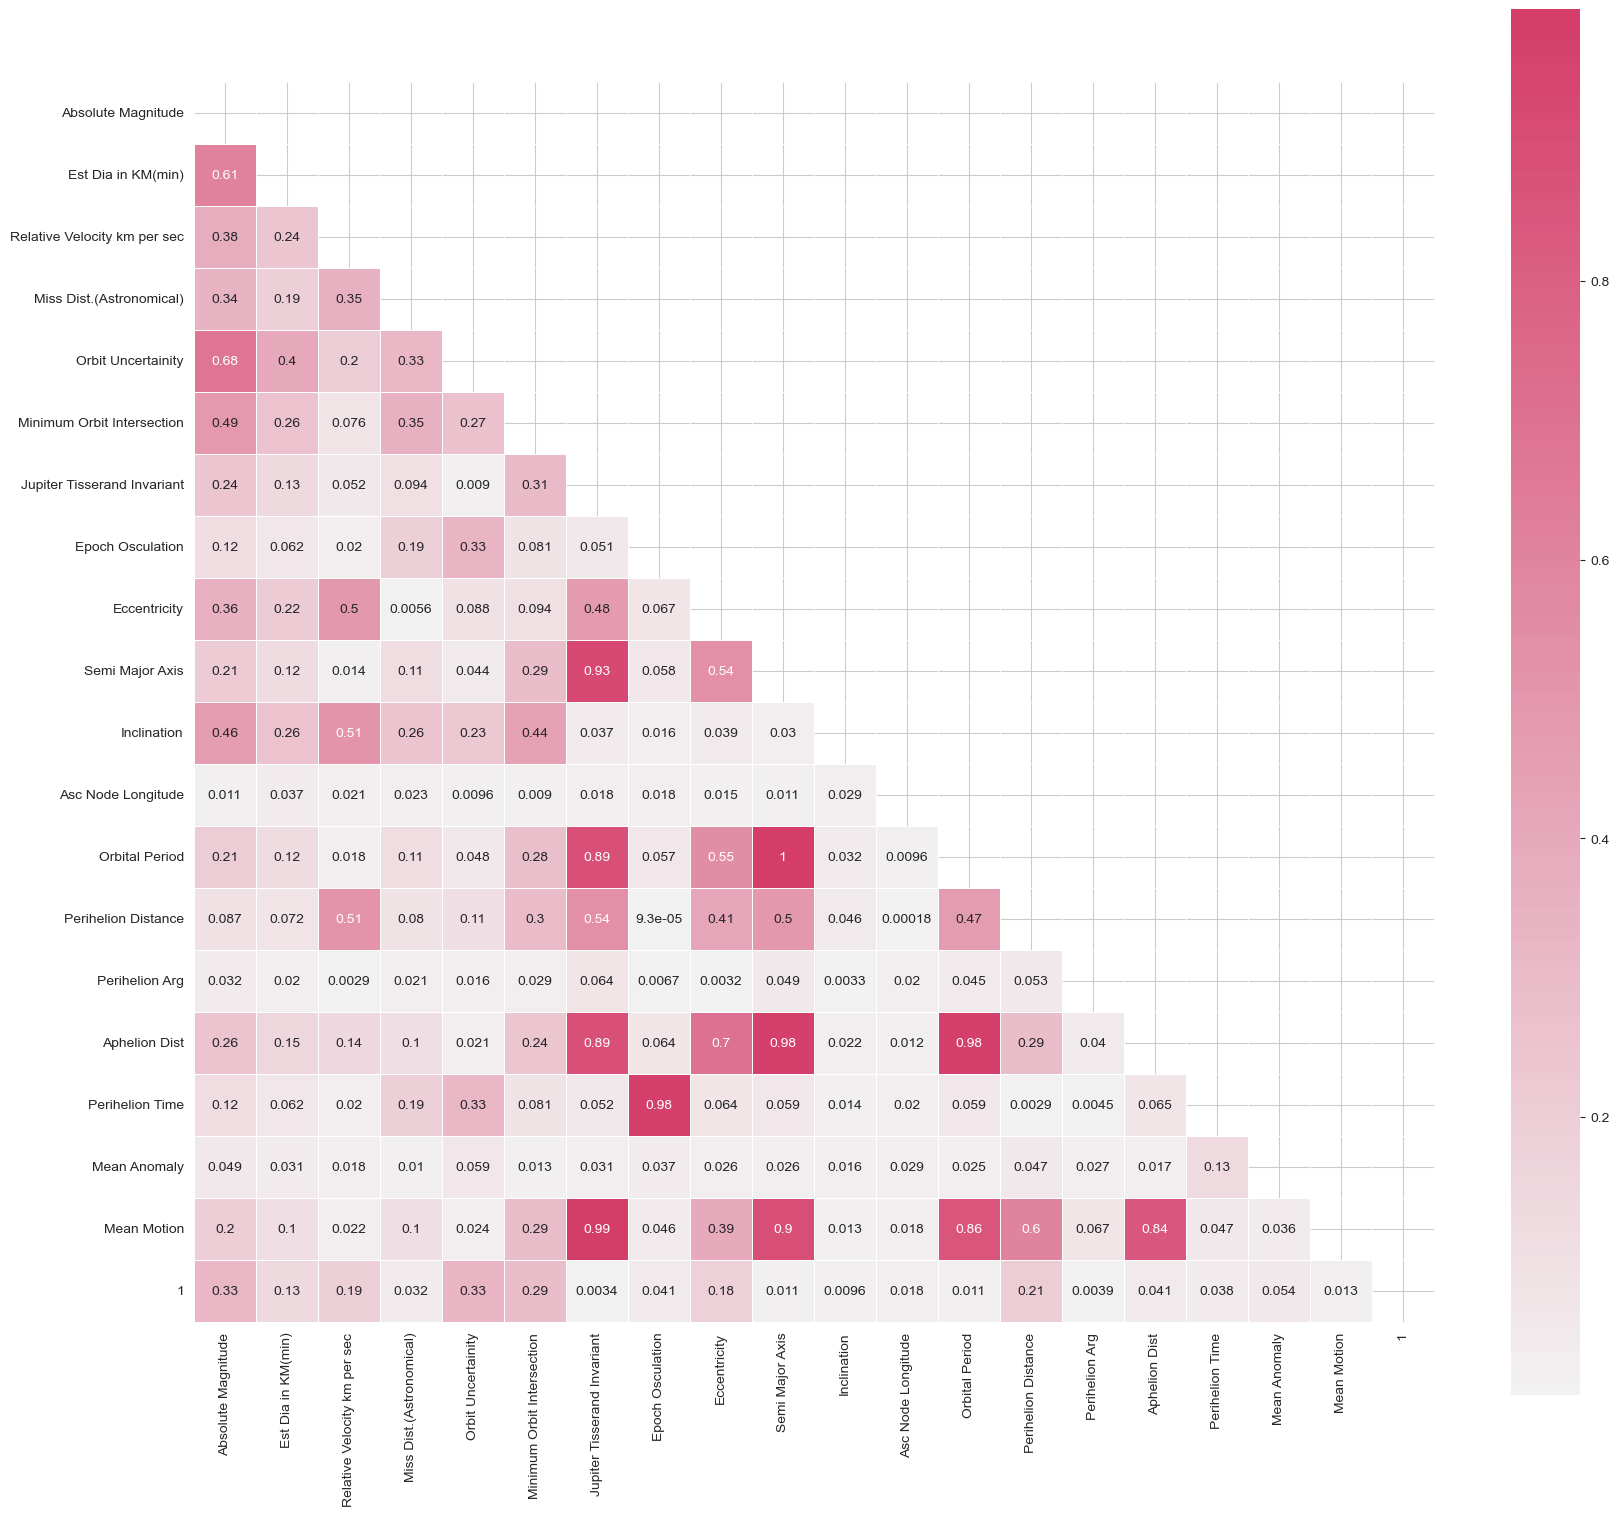

In [64]:
#Correlation Detection-

correlation_mat = df.corr().abs()

mask = np.triu(np.ones_like(correlation_mat, dtype = np.bool_))
f, ax = plt.subplots(figsize = (20, 20))
cmap = sns.diverging_palette(255, 0, as_cmap = True)
sns.heatmap(correlation_mat, mask = mask, cmap = cmap,\
vmax = None,center = 0, square = True, annot = True, \
linewidths = .5, cbar_kws = {"shrink": 0.9})

#Print out almost perfect correlated features-

upper_triangle = correlation_mat.where(np.triu(np.ones\
(correlation_mat.shape),k = 1).astype(np.bool_))

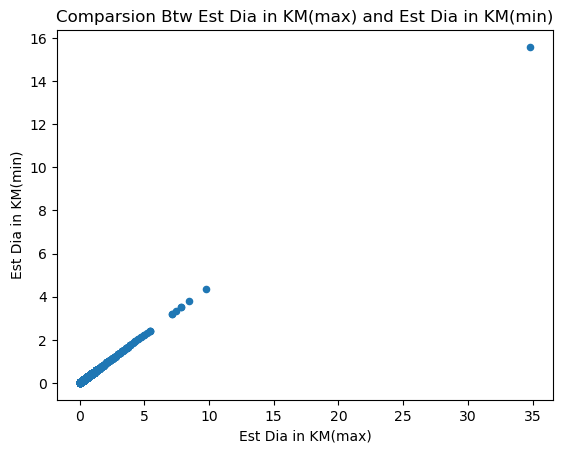

In [24]:
#Scatter Plot-

df.plot(kind='scatter', x='Est Dia in KM(max)', y='Est Dia in KM(min)')
plt.title('Comparsion Btw Est Dia in KM(max) and Est Dia in KM(min)')
plt.show()

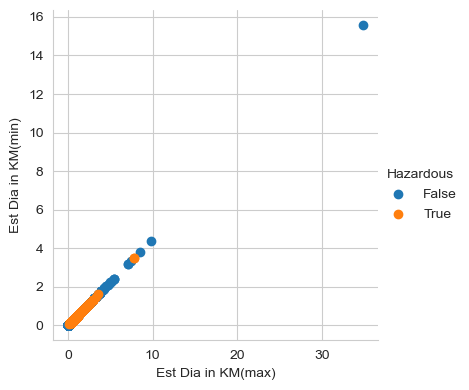

In [25]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='Hazardous', height=4).map(plt.scatter, 'Est Dia in KM(max)', 'Est Dia in KM(min)').add_legend()
plt.show()

(0.0, 16.35847950627)

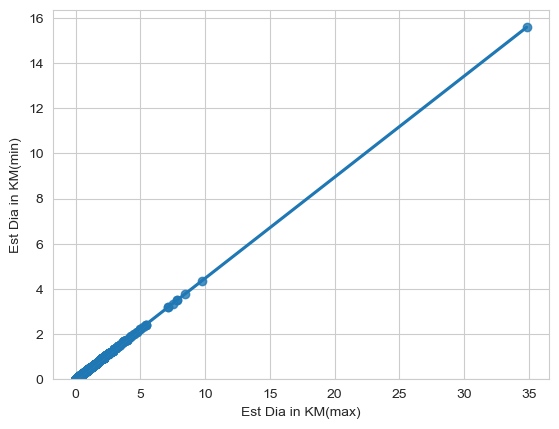

In [26]:
sns.regplot(x = 'Est Dia in KM(max)', y = 'Est Dia in KM(min)', data = df)
plt.ylim(0, )

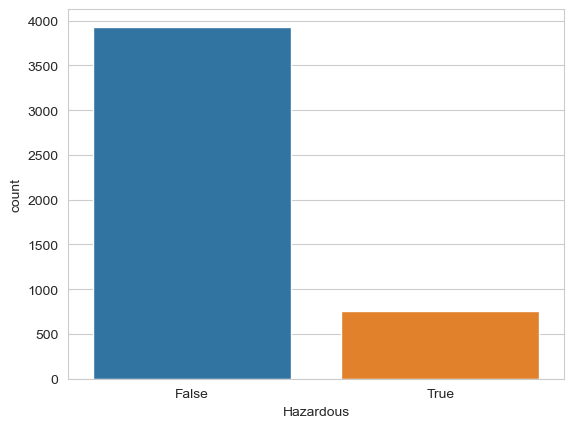

In [27]:
#Barplot-

sns.countplot(data=df, x='Hazardous')
plt.show()

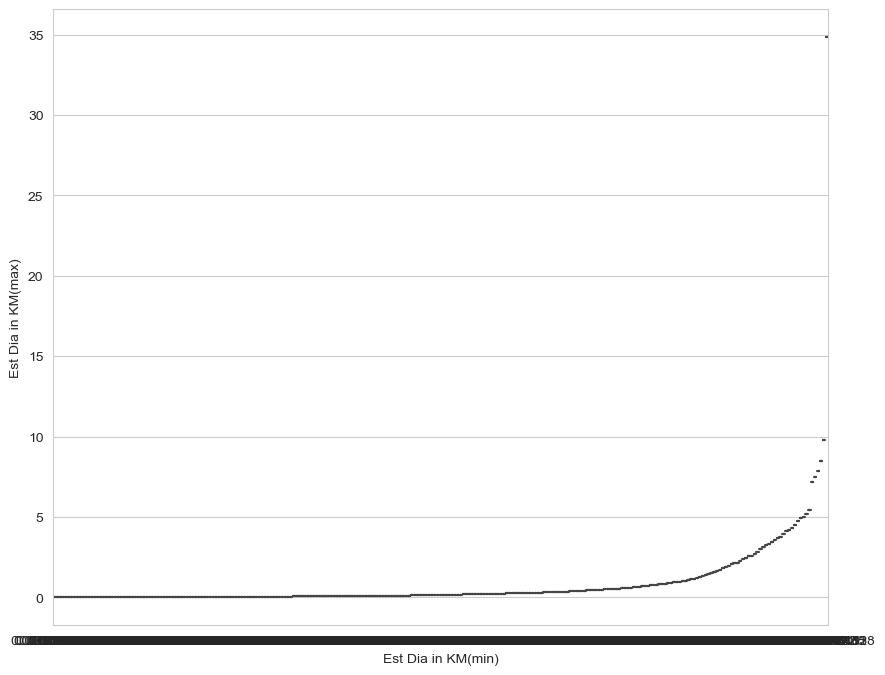

In [40]:
#Boxplot-

plt.figure(figsize=(10, 8))
sns.boxplot(x = 'Est Dia in KM(min)', y = 'Est Dia in KM(max)', data = df)
plt.show()

<Axes: >

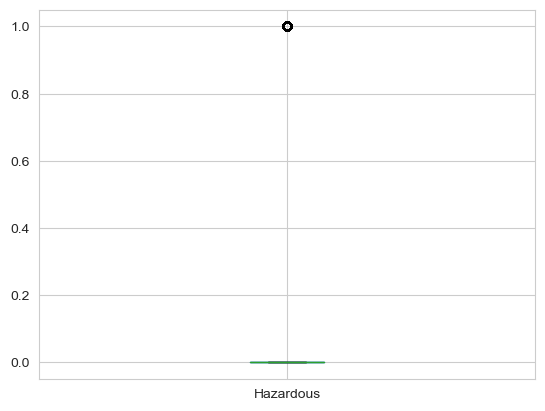

In [29]:
df[['Hazardous']].boxplot()

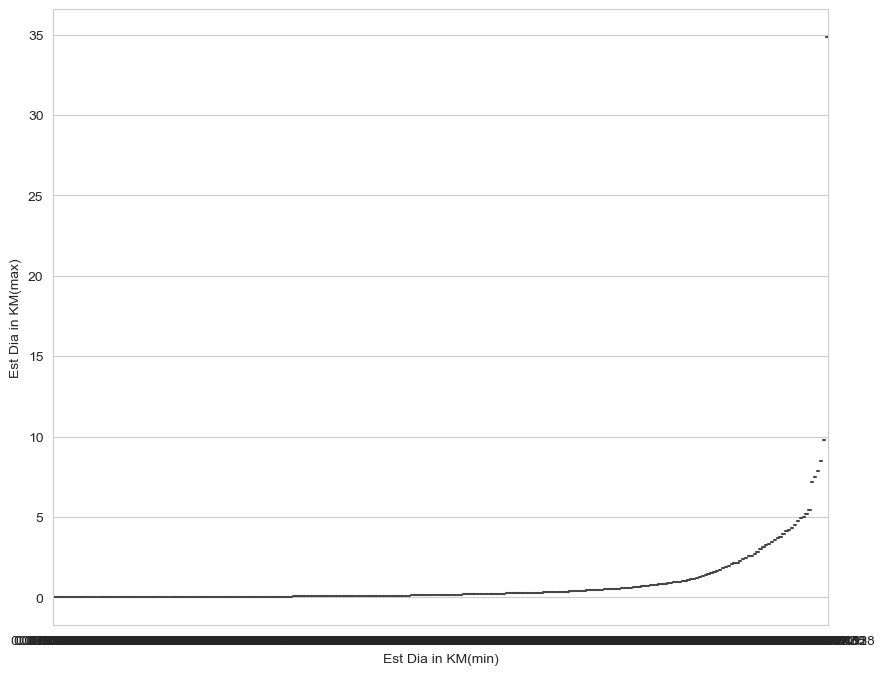

In [39]:
#Vilon Plot- 

plt.figure(figsize=(10, 8))
sns.violinplot(x='Est Dia in KM(min)', y='Est Dia in KM(max)', data=df)
plt.show()

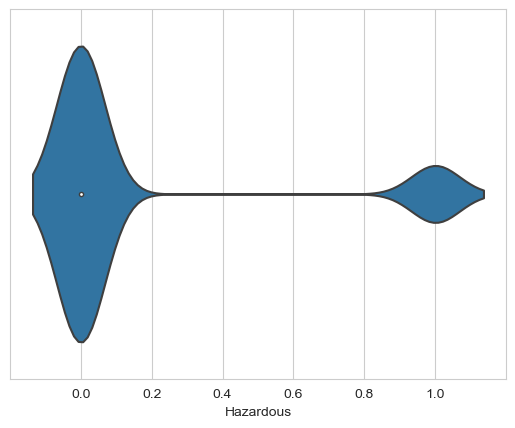

In [35]:
df['Hazardous'] = df['Hazardous'].astype(int)
sns.violinplot(x=df['Hazardous'])
plt.show()

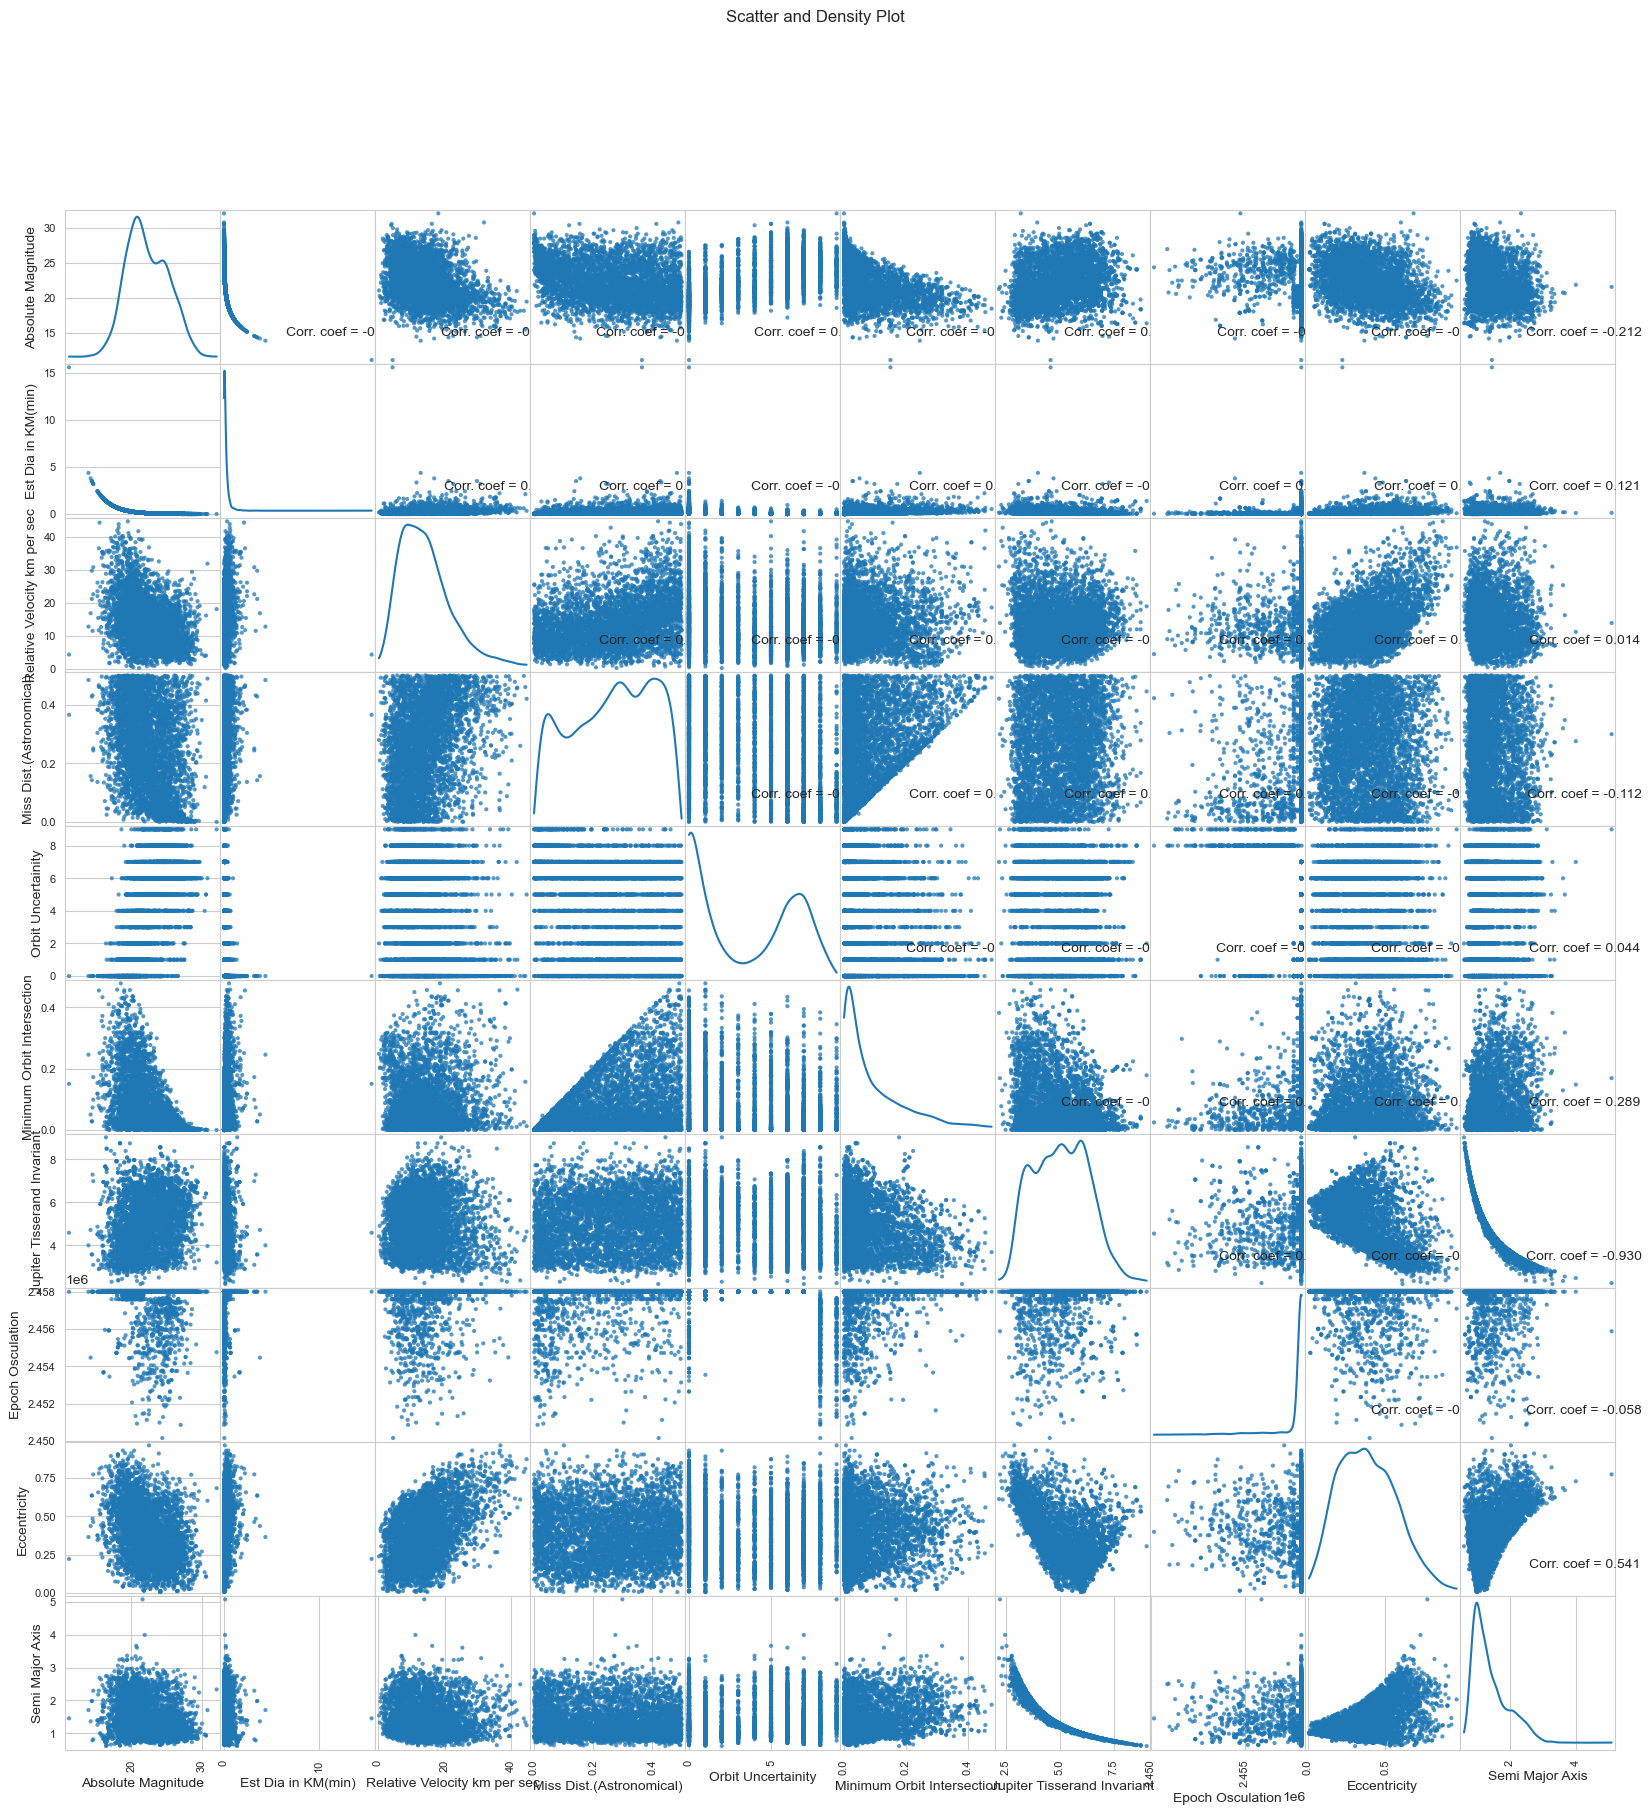

In [62]:
#Scatter and density plots-

def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', 
                          ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
    
plotScatterMatrix(df, 20, 10)

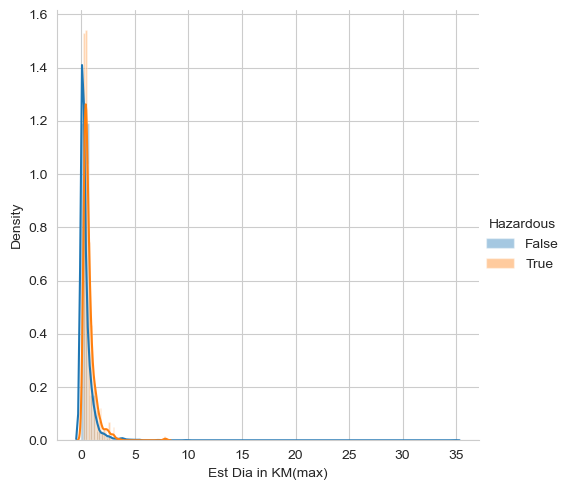

In [32]:
#Histrogram And Probability Distribution-

sns.FacetGrid(df, hue='Hazardous', height=5).map(sns.distplot, 'Est Dia in KM(max)').add_legend()

### 2.1 One hot encoding on Hazardous column:

In [41]:
#One hot encoding on Hazardous column-

hazardous_labels = pd.get_dummies(df['Hazardous'])
hazardous_labels

,0,1
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
4682,1,0
4683,1,0
4684,1,0
4685,1,0


In [42]:
df = pd.concat([df, hazardous_labels], axis = 1)
df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous,0,1
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,6.115834,...,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,1,0,1
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,...,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,0,1,0
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,...,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,1,0,1
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173874,...,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,0,1,0
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,9.840831,...,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,1,0,1


In [43]:
df = df.drop(['Hazardous'], axis = 1)
df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,0,1
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,6.115834,...,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,0,1
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,...,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,1,0
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,...,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,0,1
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173874,...,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,1,0
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,9.840831,...,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,0,1


### 2.2 Observing Unique Values in Orbiting Body and Equinox & Both Columns can be dropped, as both have single one value present:

In [46]:
df['Orbiting Body'].value_counts()

Earth    4687
Name: Orbiting Body, dtype: int64

In [47]:
df['Equinox'].value_counts()

J2000    4687
Name: Equinox, dtype: int64

In [48]:
df = df.drop(['Orbiting Body', 'Equinox'], axis = 1)

### 2.3 Need to drop Some Columns as they are having correlation 1 because they are identical columns with a different unit:

In [50]:
df = df.drop(['Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)'
             ,'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 
             'Relative Velocity km per hr', 'Miles per hour', 'Miss Dist.(lunar)', 
             'Miss Dist.(kilometers)', 'Miss Dist.(miles)'], axis = 1)
df.head()

,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,0,1
0,21.6,0.127220,6.115834,0.419483,5,0.025282,4.634,2458000.5,0.425549,1.407011,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,0,1
1,21.3,0.146068,18.113985,0.383014,3,0.186935,5.457,2458000.5,0.351674,1.107776,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,1,0
2,20.3,0.231502,7.590711,0.050956,0,0.043058,4.557,2458000.5,0.348248,1.458824,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,0,1
3,27.4,0.008801,11.173874,0.285322,6,0.005512,5.093,2458000.5,0.216578,1.255903,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,1,0
4,21.6,0.127220,9.840831,0.407832,1,0.034798,5.154,2458000.5,0.210448,1.225615,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,0,1


<Axes: >

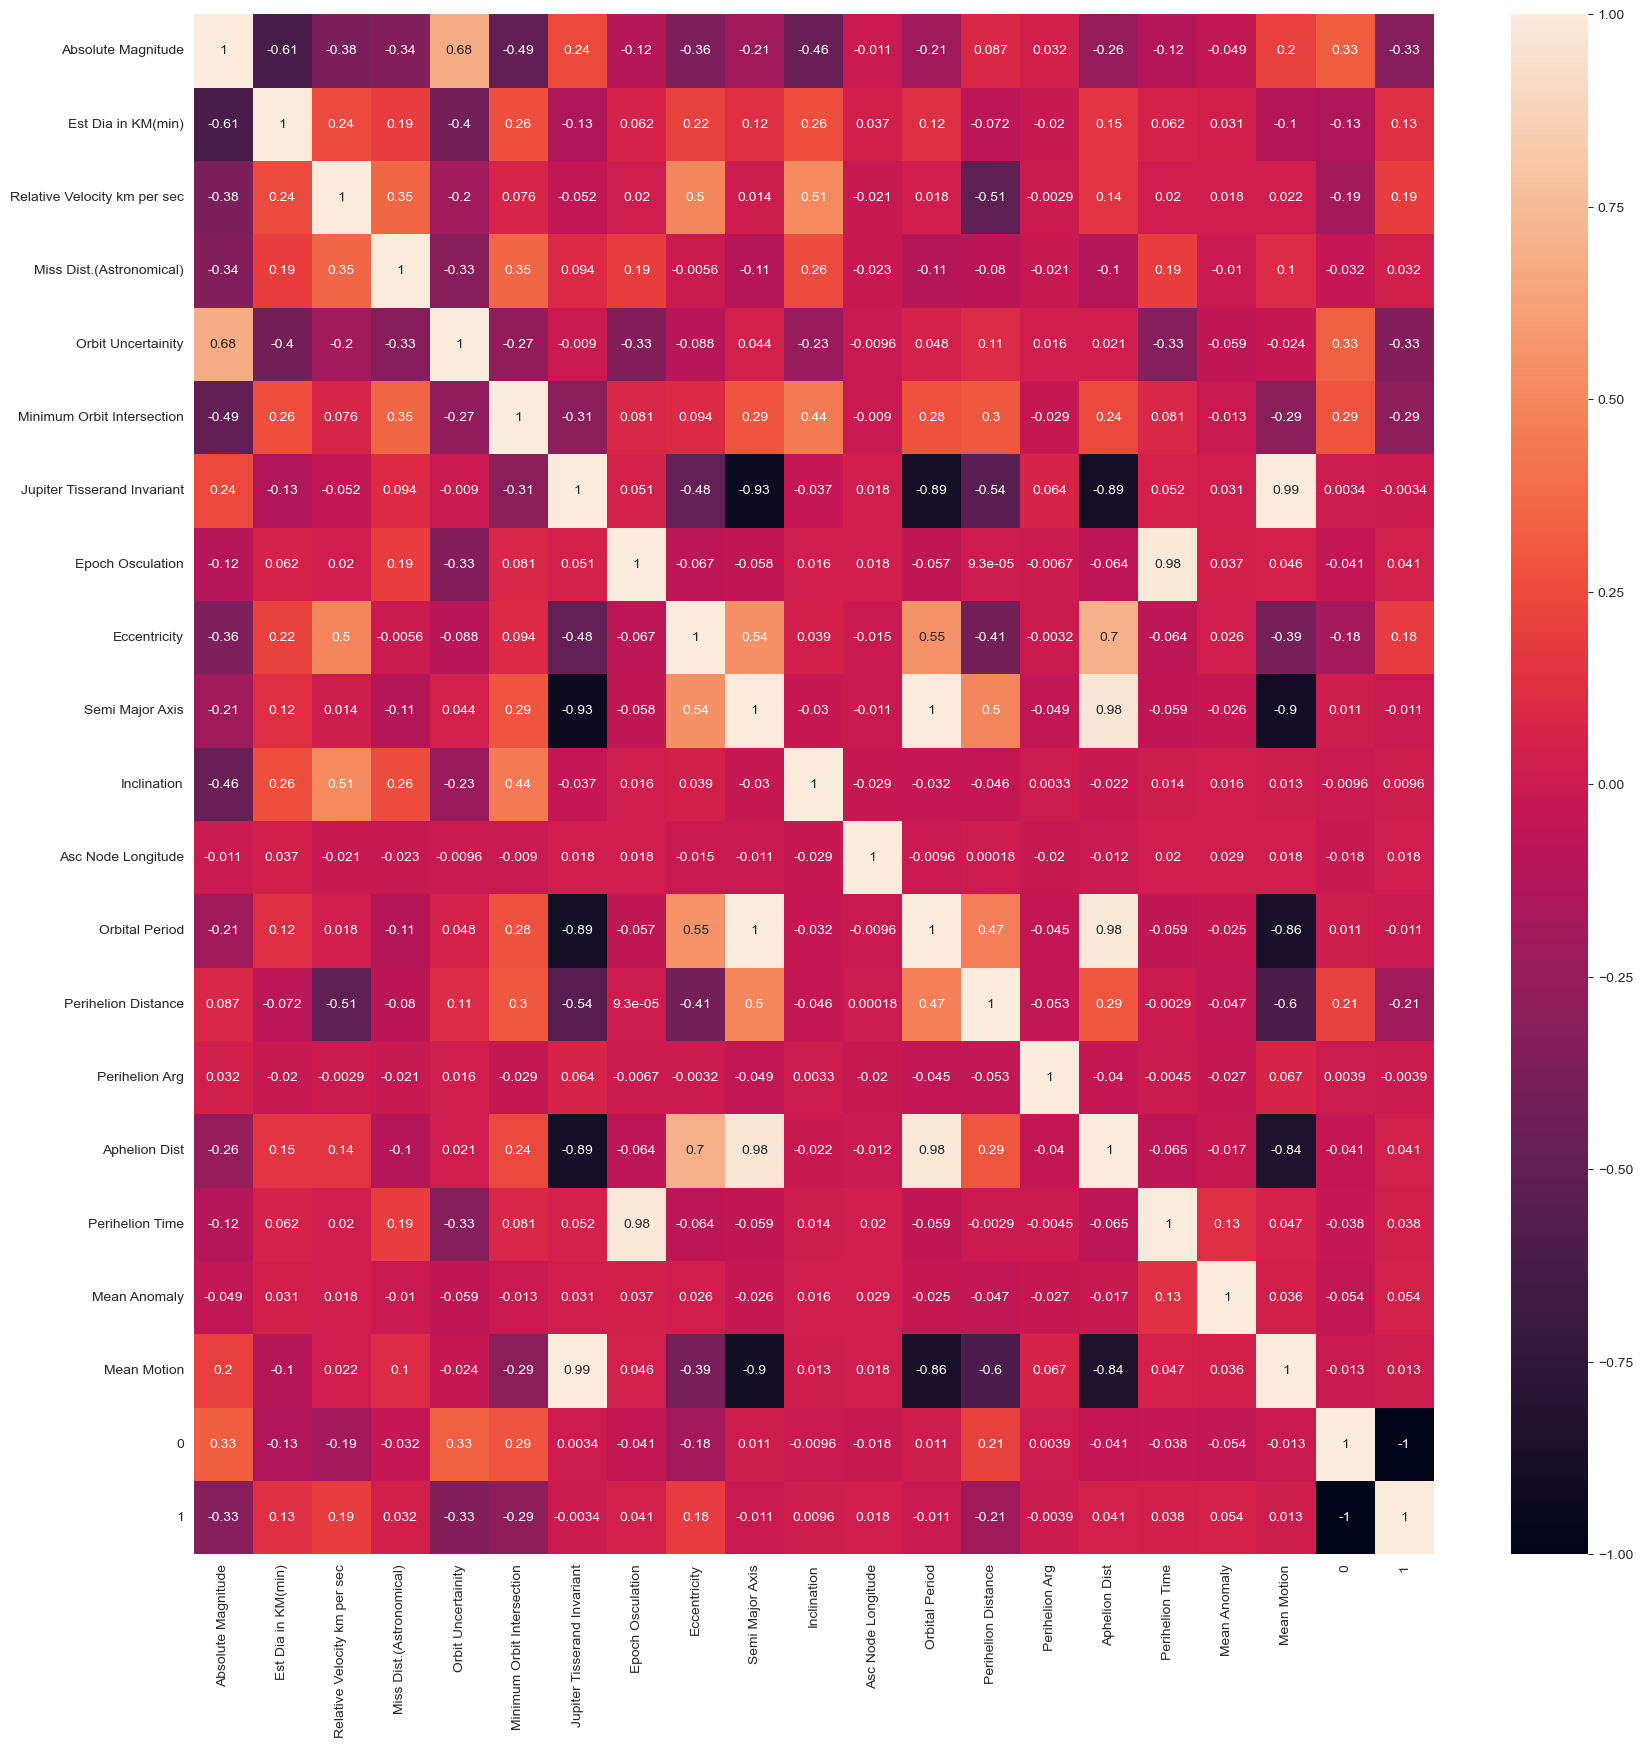

In [51]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True)

In [52]:
#Now as True Column is needed for our Classifications , therefore False column can be drop from dataset-

df.drop(False, axis = 1, inplace = True)
df.head()

,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,1
0,21.6,0.127220,6.115834,0.419483,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.3,0.146068,18.113985,0.383014,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.3,0.231502,7.590711,0.050956,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.4,0.008801,11.173874,0.285322,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.6,0.127220,9.840831,0.407832,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1


## Building the Model:

In [53]:
x = df.drop([True], axis = 1)
y = df[True].astype(int)

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0 , test_size = 0.3)

## XGBoost Classifier:

XGBoost Classifier is a popular machine learning algorithm used in data analysis for classification tasks. It leverages gradient boosting techniques to create an ensemble of decision tree models that work together to make accurate predictions. It is known for its high performance, ability to handle large datasets, and robustness to overfitting. XGBoost Classifier is widely used in data analysis to solve classification problems, providing accurate predictions and valuable insights into feature importance.A wide range of applications: Can be used to solve regression, classification, ranking, and user-defined prediction problems.The XGBoost library provides a built-in function to plot features ordered by their importance.

In [56]:
#Imports-

from xgboost import XGBClassifier
from matplotlib import pyplot
from xgboost import plot_importance

In [57]:
xbg_model = XGBClassifier()
xbg_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

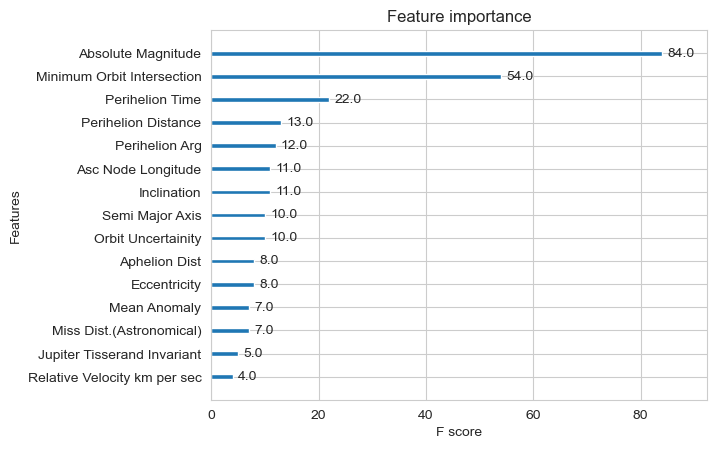

In [58]:
plot_importance(xbg_model)
pyplot.show()

## Final Accuracy Score:

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
predictions = xbg_model.predict(x_test)
acc = accuracy_score(y_test, predictions)
print(str(np.round(acc*100, 2))+'%')

99.57%
